We are working on the dataset from network repository. The dataset is called FB-PAGES-TVSHOWS. Nodes represent the individual Facebook TV show pages while the links are mutual likes among these pages.

https://networkrepository.com/fb-pages-tvshow.php





#0. Parse the dataset

In [5]:
# import pandas used for reading dataframe
# import matplotlib to visualize the graph
# import nx to use create a graph
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# Define the file path
edgelist_file = '/content/sample_data/fb-pages-tvshow.edges'

#Read edgelist
# Delimiter is a comma since dataset is in format "(first_node, second_node)"
G = nx.read_edgelist(edgelist_file, delimiter=',', create_using=nx.Graph())



#1. Display the number of nodes and edges

In [ ]:
def get_graph_info(graph):
    #gets number of nodes
    print("Number of nodes:", graph.number_of_nodes())
    #gets number of edges
    print("Number of edges:", graph.number_of_edges())
    #gets a list of nodes
    print("Available nodes:", list(graph.nodes))
    # gets a list of edges
    print("Available edges:", list(graph.edges))

# call the function
get_graph_info(G)


Number of nodes: 3892
Number of edges: 17262
Available nodes: ['0', '1838', '1744', '14', '2543', '1', '1009', '1171', '1465', '2069', '2080', '1856', '3799', '1033', '2717', '300', '1603', '942', '3678', '952', '815', '2', '3656', '3459', '1157', '1993', '3', '386', '2659', '2160', '1925', '3511', '372', '1506', '2303', '1634', '1706', '3038', '749', '2790', '452', '1936', '2915', '2972', '1100', '2918', '3026', '2406', '1673', '11', '3156', '2250', '2350', '1050', '1060', '1457', '3054', '72', '1553', '1114', '3525', '2064', '3791', '1595', '1177', '1596', '2935', '545', '1840', '423', '1788', '2890', '603', '1498', '703', '1073', '1422', '3283', '2590', '3431', '354', '1720', '3291', '2773', '2804', '2476', '2036', '46', '1986', '2588', '3507', '566', '4', '667', '1931', '5', '275', '1874', '3832', '2847', '1929', '3237', '1209', '578', '3852', '1452', '2361', '590', '2005', '77', '3409', '2816', '80', '2454', '1119', '771', '3204', '2201', '2764', '1609', '315', '3550', '1193', '23

#2. Display the number of connected components

In [ ]:
# gets the number of connected components
print(nx.number_connected_components(G))

1


#3. Display the diameter

In [ ]:
# gets the diameter
print(nx.diameter(G))

20


#4.Display the top 5 clustering coefficients

In [ ]:
# get clustering coefficient values; returns a dictionary
clustering_coefficients = nx.clustering(G)

#sorts and keeps only the top five
top_nodes = sorted(clustering_coefficients, key=clustering_coefficients.get, reverse=True)[:5]

# Display the Results
for node in top_nodes:
    coefficient = clustering_coefficients[node]
    print(f"Node {node}: Clustering Coefficient = {coefficient}")

Node 2972: Clustering Coefficient = 1.0
Node 3283: Clustering Coefficient = 1.0
Node 4: Clustering Coefficient = 1.0
Node 2713: Clustering Coefficient = 1.0
Node 7: Clustering Coefficient = 1.0


#5.The five nodes with the highest betweenness centrality (node betweenness).

In [ ]:
# get betweeness centrality values; returns a dictionary
betweenness_centrality_ = nx.betweenness_centrality(G)

# sorts the nodes and keeps the top 5
top_nodes = sorted(betweenness_centrality_, key=betweenness_centrality_.get, reverse=True)[:5]

# Display the Results
for node in top_nodes:
    centrality = betweenness_centrality_[node]
    print(f"Node {node}: Betweenness Centrality = {centrality}")

Node 3254: Betweenness Centrality = 0.10544488181477074
Node 2008: Betweenness Centrality = 0.09352541687013526
Node 819: Betweenness Centrality = 0.0804900367587108
Node 2170: Betweenness Centrality = 0.07471499425323284
Node 2751: Betweenness Centrality = 0.07465790776474893


#6. Community detection

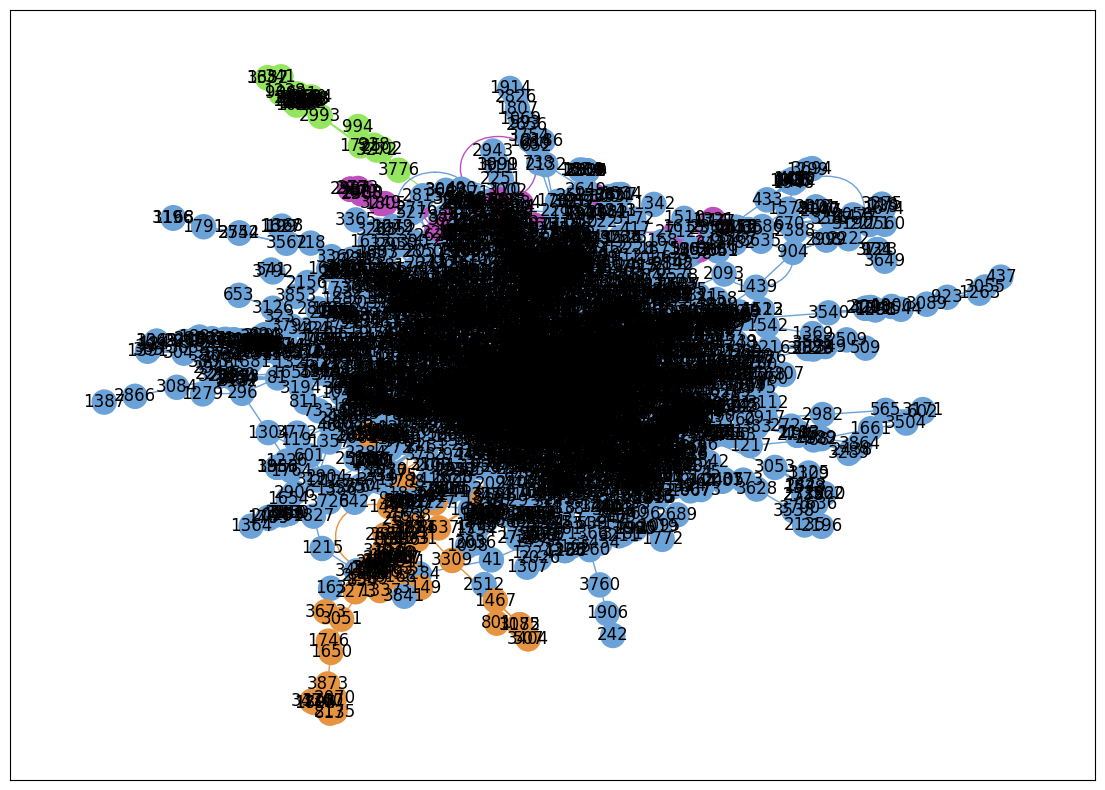

In [9]:
# this import statement is used for community detection
import networkx.algorithms.community as nx_comm
# import this to slice the communities
import itertools

# 3 helper functions

# gets the communities
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1

# set the edges of the communities
def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0

# color codes graph's nodes and edges
def get_color(i, r_off=1, g_off=1, b_off=1):
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

# call girvan newman algorithm
result = nx_comm.girvan_newman(G)
#communities = next(result)

#sliced it from Step 2 to 3
communities = next(itertools.islice(result, 2, 3))

# set nodes and edges of communities
set_node_community(G, communities)
set_edge_community(G)

# call the get color function and color code the nodes
node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]

# Color codes the edges
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = [get_color(G.edges[e]['community']) for e in internal]

#set the position to spring layout
pos1 = nx.spring_layout(G)

# Visualize the graph

#add figure size
plt.figure(figsize=(14, 10))

nx.draw_networkx(
    G, pos=pos1, node_size=0,
    edgelist=external, edge_color="#333333", with_labels=False)
nx.draw_networkx(
    G, pos=pos1, node_color=node_color,
    edgelist=internal, edge_color=internal_color)

plt.show()

# Display the number of communities and modularity score
#returns communities
print("# of communities: ", len(communities), ", modularity score: ", nx_comm.modularity(G, communities))

In [11]:
#result = nx_comm.girvan_newman(G)
#communities = next(result)
#communities = next(itertools.islice(result, 2, 3))

# result of Girvan Newman Algorithm
print("# of communities: ", len(communities), ", modularity score: ", nx_comm.modularity(G, communities))

# of communities:  4 , modularity score:  0.03602357841173616


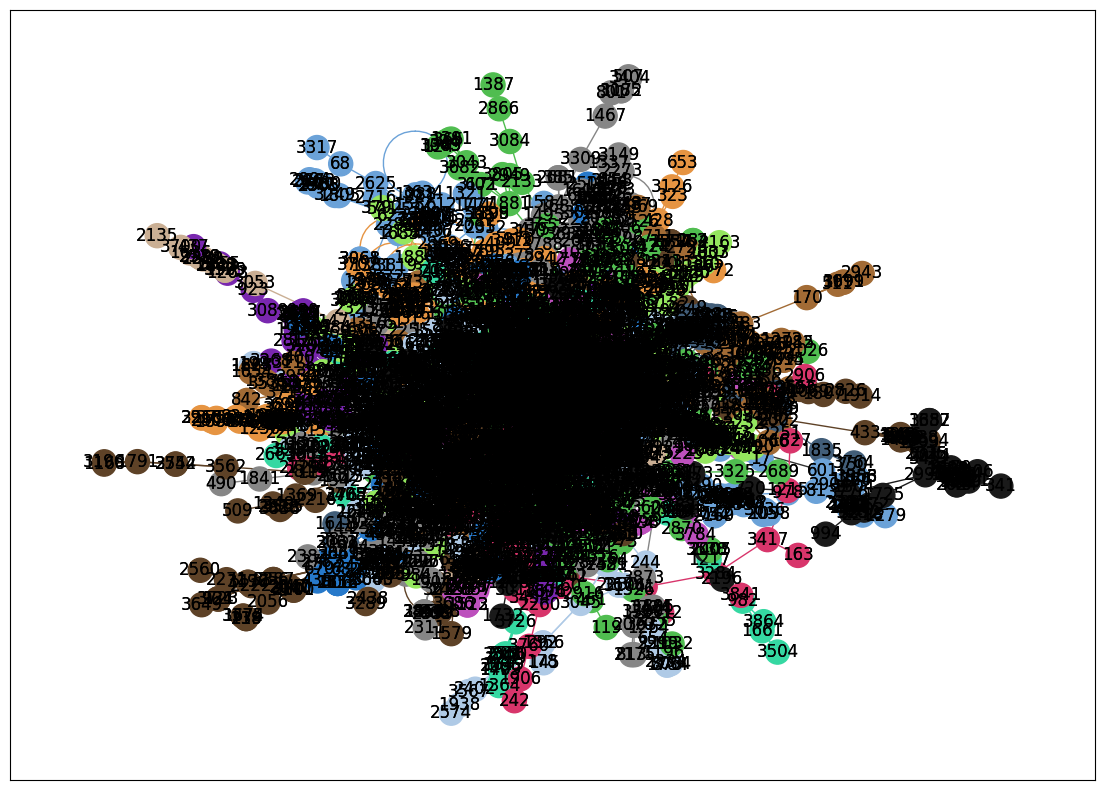

# of communities:  46 , modularity score:  0.8721668853348115


In [ ]:
#import statements for community detection, graph visualization, and use of Network X
import networkx as nx
import matplotlib.pyplot as plt
import networkx.algorithms.community as nx_comm

# 3 helper functions

# get the communities
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1

# set the edges of the communities
def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0

# color codes the nodes and edges
def get_color(i, r_off=1, g_off=1, b_off=1):
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

# call the louvain algorithm with a seed to have reproducible results
partition=nx_comm.louvain_communities(G, seed=123)

# set nodes and edges
set_node_community(G, partition)
set_edge_community(G)

# Set community color for nodes
node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]

# Set community color for internal edges
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = [get_color(G.edges[e]['community']) for e in internal]

#Sets position to spring layout
pos1 = nx.spring_layout(G)

#Visualizes the graph

#change figure size
plt.figure(figsize=(14, 10))

# Draw external edges
nx.draw_networkx(
    G,
    pos=pos1,
    node_size=0,
    edgelist=external,
    edge_color="#333333")
# Draw nodes and internal edges
nx.draw_networkx(
    G,
    pos=pos1,
    node_color=node_color,
    edgelist=internal,
    edge_color=internal_color)
plt.show()

# Displays the number of communities and modularity score
print("# of communities: ", len(partition), ", modularity score: ", nx_comm.modularity(G, partition))

#Visualization Draft

In [ ]:
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#import networkx as nx

# File path
#edgelist_file = '/content/sample_data/fb-pages-tvshow.edges'

# Read edgelist
#G = nx.read_edgelist(edgelist_file, delimiter=',', create_using=nx.Graph())

# Calculate degrees for all nodes
#d = dict(G.degree)

# Set figure size
#plt.figure(figsize=(14, 10))

# Layout
#pos1 = nx.spring_layout(G, scale=40, k=0.01/100)


# Draw nodes
#nx.draw(G, pos1, node_color='lightblue',
        #with_labels=True,
        #node_size =[d[node]*300 for node in G.nodes()])

#plt.show()


